<a href="https://colab.research.google.com/github/sravanirachamalla/MLP2021/blob/main/tym_pass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [121]:
covid_df= pd.read_csv('https://raw.githubusercontent.com/sravanirachamalla/MLP2021/main/Latest%20Covid-19%20India%20Status.csv')

In [122]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/UTs            36 non-null     object 
 1   Total Cases          36 non-null     int64  
 2   Active               36 non-null     int64  
 3   Discharged           36 non-null     int64  
 4   Deaths               36 non-null     int64  
 5   Active Ratio (%)     36 non-null     float64
 6   Discharge Ratio (%)  36 non-null     float64
 7   Death Ratio (%)      36 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


# **Creating feature set(X) and Y**

In [123]:
import statsmodels.api as sm
X = sm.add_constant(covid_df['Discharged'] )
X.head(5)

,const,Discharged
0,1.0,7421
1,1.0,1977163
2,1.0,51023
3,1.0,572084
4,1.0,715853


In [124]:
Y = covid_df['Total Cases']

# Splitting the dataset into training and validation sets

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
train_X, test_X, train_y, test_y = train_test_split(X ,
                                                    Y,
                                                    train_size = 0.8,
                                                    random_state = 100 ) 

# Fitting the Model

In [127]:
covid_df= sm.OLS( train_y, train_X ).fit()

# Printing Estimated Parameters and interpreting them

In [128]:
print( covid_df.params )

const        -6395.934711
Discharged       1.031571
dtype: float64


# Model Diagnostics

In [129]:
covid_df.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:                OLS              Adj. R-squared:     1.000     
Dependent Variable:   Total Cases      AIC:                629.5257  
Date:                 2021-08-27 17:44 BIC:                632.1901  
No. Observations:     28               Log-Likelihood:     -312.76   
Df Model:             1                F-statistic:        1.755e+05 
Df Residuals:         26               Prob (F-statistic): 2.56e-51  
R-squared:            1.000            Scale:              3.1764e+08
---------------------------------------------------------------------
             Coef.     Std.Err.    t     P>|t|     [0.025     0.975] 
---------------------------------------------------------------------
const      -6395.9347 4143.2148  -1.5437 0.1347 -14912.4348 2120.5654
Discharged     1.0316    0.0025 418.9426 0.0000      1.0265    1.0366
---------------------------------------------------------------------
Omnibus:               30.190        Durbin-Watson:           2.747  
Prob(Omnibus):         0.000         Jarque-Bera (JB):        85.590 
Skew:                  2.020         Prob(JB):                0.000  
Kurtosis:              10.553        Condition No.:           2069857
=====================================================================
* The condition number is large (2e+06). This might indicate
strong multicollinearity or other numerical problems.
"""

Residual Anlalysis

# Checking Normality

In [106]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

<Figure size 576x432 with 0 Axes>

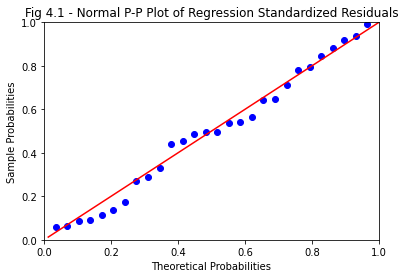

In [107]:
covid_resid = covid_df.resid
probplot = sm.ProbPlot( covid_df_resid )
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Fig 4.1 - Normal P-P Plot of Regression Standardized Residuals" )
plt.show()

# Test of Homoscedasticity

In [108]:
def get_standardized_values( vals ):return (vals - vals.mean())/vals.std()

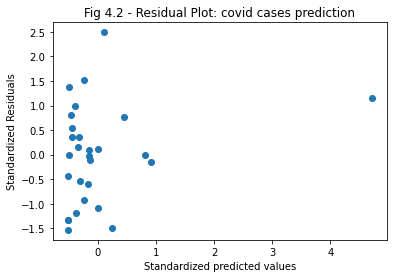

In [109]:
plt.scatter( get_standardized_values( covid_df.fittedvalues ),
get_standardized_values( covid_df_resid ) )
plt.title( "Fig 4.2 - Residual Plot: covid cases prediction" );
plt.xlabel( "Standardized predicted values")
plt.ylabel( "Standardized Residuals");

# Outlier Analysis

In [110]:
from scipy.stats import zscore

In [111]:
covid_df['z_score_Active'] = zscore( covid_df.Active )

AttributeError: ignored